# Задание 3

Вычислить интегралы:
  
$$I_{3a} = \int_{-1}^{1} \frac{dx}{1+x^2}, \;\;\; I_{3b} = \int_{0}^{1} x^{1/3} e^{sin x}dx$$
    
методами трапеций и Симпсона, разделив отрезок интегрирования на 4, 8, 16, . . .
интервалов. Как убывает погрешность численного интегрирования с ростом числа
интервалов?

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
def f1(x):
    return 1./(1+x**2)
def f2(x):
    return x**(1/3)*exp(sin(x))

In [23]:
root1 = 1.57079632679
root2 = 1.29587400873
root3 = 1.52444 + 0.395884j

In [4]:
def Trapezoidal(left, right, f):
    return (f(left) + f(right))/2

In [5]:
def Simpson(left, right, f):
    return (f(left) +4 * f((left+right)/2)+f(right)) /6

In [6]:
def Integrate(a, b, N, f, rule):
    a = min(a, b)
    b = max(a, b)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (b - a) /N
    _sum = 0
    #start_time = datetime.datetime.now()
    left = a
    right = a + h
    for i in range (0, N):
        _sum += rule(left, right, f)
        left += h
        right+= h
    #print("Затраченное время:", datetime.datetime.now() - start_time)
    return _sum * h

In [7]:
N = [2, 4, 8, 16, 100]
x = np.linspace(2, 100, 100)
y2 = np.power(x, -2)
y4 = np.power(x, -4)

In [8]:
def Analyze(a, b, f, rule, root, o):
    errors = []
    for n in N:  
        I = Integrate(a, b, n, f, rule)
        err = abs(root - I)
        errors.append(err)
        print("Количество разбиений:", n)
        print("Интеграл:", I)
        print("Ошибка:", err)
        print('\n')
    plt.figure(figsize=(8, 6))
    plt.title("Зависимость погрешности от количества интервалов")
    plt.xlabel("Количество интервалов")
    plt.ylabel("Погрешность")
    plt.plot(N, errors, linewidth = 2, label="Реальная ошибка")
    plt.plot(x, o, linewidth = 1, color = 'red', label="Ожидаемая ошибка")
    plt.legend()
    plt.show()

## Первый интеграл

**Метод Трапеций**

Количество разбиений: 2
Интеграл: 1.5
Ошибка: 0.07079632679000003


Количество разбиений: 4
Интеграл: 1.55
Ошибка: 0.020796326789999986


Количество разбиений: 8
Интеграл: 1.5655882352941177
Ошибка: 0.0052080914958823055


Количество разбиений: 16
Интеграл: 1.5694942472455444
Ошибка: 0.0013020795444556033


Количество разбиений: 100
Интеграл: 1.5707629934616258
Ошибка: 3.3333328374185456e-05




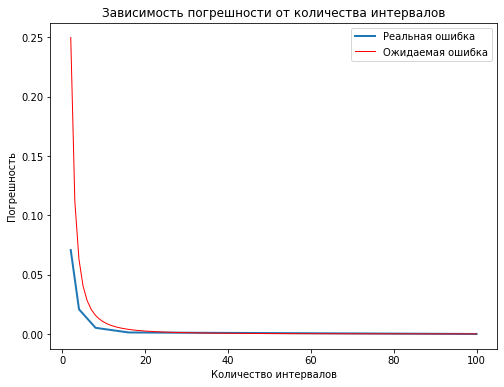

In [9]:
Analyze(-1, 1, f1, Trapezoidal, root1, y2)

**Метод Симпсона**

Количество разбиений: 2
Интеграл: 1.5666666666666667
Ошибка: 0.0041296601233333785


Количество разбиений: 4
Интеграл: 1.5707843137254902
Ошибка: 1.2013064509819316e-05


Количество разбиений: 8
Интеграл: 1.5707962512293534
Ошибка: 7.556064662850304e-08


Количество разбиений: 16
Интеграл: 1.5707963256124111
Ошибка: 1.1775889152687569e-09


Количество разбиений: 100
Интеграл: 1.570796326794877
Ошибка: 4.876987702573388e-12




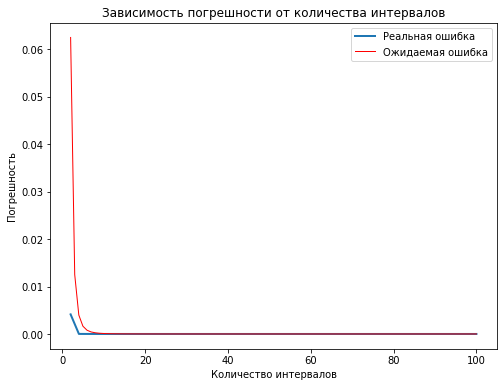

In [10]:
Analyze(-1, 1, f1, Simpson, root1, y4)

## Второй интеграл

**Метод Трапеций**

Количество разбиений: 2
Интеграл: (1.2676574000193246+0.1866613621098049j)
Ошибка: 0.3312271363559563


Количество разбиений: 4
Интеграл: (1.3976526622934682+0.30611785086529647j)
Ошибка: 0.15534796597697695


Количество разбиений: 8
Интеграл: (1.4685338695218704+0.35904901131821604j)
Ошибка: 0.06695006957595197


Количество разбиений: 16
Интеграл: (1.5008681433227333+0.3810459697052442j)
Ошибка: 0.02785317881753704


Количество разбиений: 100
Интеграл: (1.5222435310539717+0.39458159145848715j)
Ошибка: 0.0025535747178949794




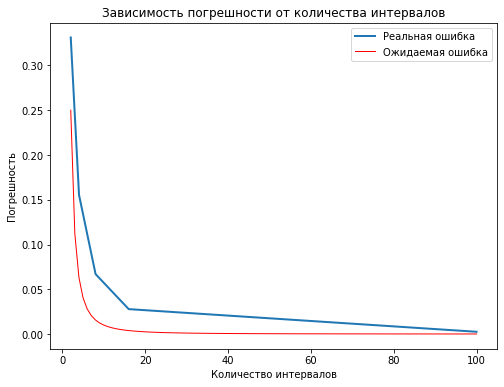

In [24]:
Analyze(-1, 1, f2, Trapezoidal, root3, y2)

**Метод Симпсона**

Количество разбиений: 2
Интеграл: (1.4409844163848493+0.3459366804504603j)
Ошибка: 0.09726031650539313


Количество разбиений: 4
Интеграл: (1.4921609385980044+0.3766927314691892j)
Ошибка: 0.037553196838824465


Количество разбиений: 8
Интеграл: (1.5116462345896875+0.3883782891675868j)
Ошибка: 0.014832940654971752


Количество разбиений: 16
Интеграл: (1.5193562415369497+0.39292583709264994j)
Ошибка: 0.0058817793138690195


Количество разбиений: 100
Интеграл: (1.523995923673232+0.39562875398067243j)
Ошибка: 0.0005122053439573327




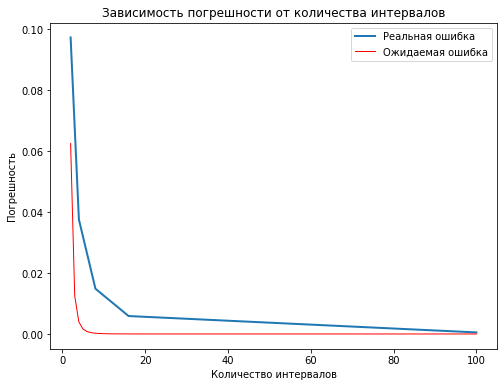

In [25]:
Analyze(-1, 1, f2, Simpson, root3, y4)

In [19]:
def test_f(x):
    return np.power(x, 3)

In [21]:
Integrate(0, 1, 100, test_f, Simpson) - 1/4

4.996003610813204e-16

In [15]:
Integrate(0, 1, 100, test_f, Trapezoidal)

0.5000000000000002